## Milestone 1 - Classical Image Data Preprocessing

In [0]:
# Import libraries

from collections import Counter

from cv2 import imread, resize, cvtColor, COLOR_BGR2RGB
from glob import glob
from random import randint
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Define constants

root_folder = "/data/workspace_files/kaggle_cars_data"
class_names = ["swift", "wagonr"]
dataset_name = "cars"
train_folder = "train"
test_folder = "test"
validation_folder = "validation"

# Defining image dimension constants
new_width, new_height = 100, 100
number_channels = 3

## Estimate data set sizes for training, testing and validation

In [0]:
def get_files_list(folder_name):
    # Read list of files from a given folder
    files_list = []
    for class_name in class_names:
        for file_name in glob(f'{root_folder}/{dataset_name}/{folder_name}/{class_name}/*.jpg'):
            files_list.append(file_name)            
    return files_list

In [0]:
train_list = get_files_list(train_folder)
print(f'Number of files in train folder: {len(train_list)}')

Number of files in train folder: 2400


In [0]:
validation_list = get_files_list(validation_folder)
print(f'Number of files in validation folder: {len(validation_list)}')

Number of files in validation folder: 800


In [0]:
test_list = get_files_list(test_folder)
print(f'Number of files in test folder: {len(test_list)}')

Number of files in test folder: 800


## Sample data from training data set

In [0]:
def read_and_reshape_image(file_path, show_shape=False):
  # Reads the image from the filepath, resizes and normalizes it
  image = imread(file_path)

  if show_shape: print(f"Shape: {image.shape}")

  image = resize(image, (new_width, new_height))
  image = cvtColor(image, COLOR_BGR2RGB)
  image = image / 255
  
  if show_shape: print(f"Reshape: {image.shape}")

  return image

Sample entry from training data list
Shape: (153, 271, 3)
Reshape: (100, 100, 3)


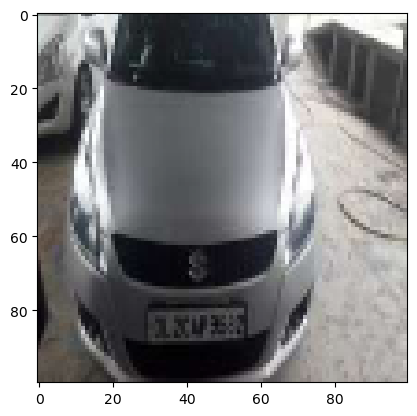

In [0]:
# Plot entry from training data list

print(f'Sample entry from training data list')

image = read_and_reshape_image(train_list[10], show_shape=True)

plt.imshow(image)

In [0]:
def show_images(images_list):
    # Plot image list
    n: int = len(images_list)
    f = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 4
    for i in range(columns*rows):
        image_path = images_list[randint(0, n - 1)]
        fol_name = image_path.split("/")[-2]
        ax = f.add_subplot(rows, columns, i + 1)
        ax.set_title(fol_name)
        image = read_and_reshape_image(image_path)
        plt.axis('off')
        plt.imshow(image)

    plt.show(block=True)

Sample from training data list


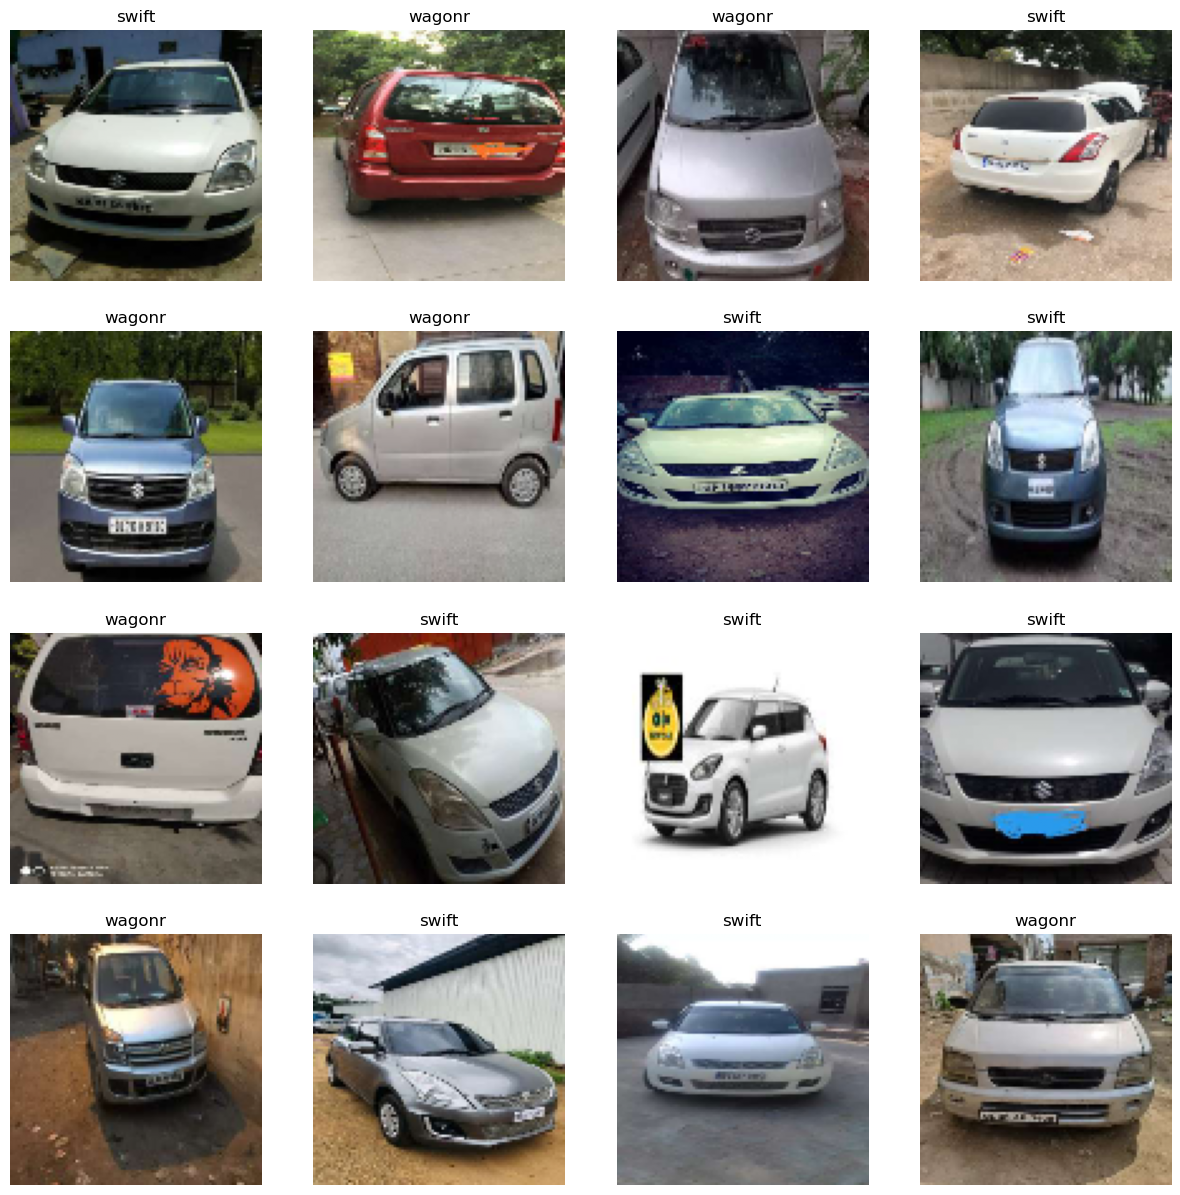

In [0]:
# Plot training data sample image list

print(f'Sample from training data list')

show_images(train_list)

## Visualization of Class Distribution

Check of the train and test data distribution for any bias present in the data before a classifier is trained.

In [0]:
def visualize_classes(image_path_list):
    image_class_list = []
    for image_path in image_path_list:
        fol_name = image_path.split("/")[-2]
        image_class_list.append(fol_name)

    image_class_counter = Counter(image_class_list)
    plt.bar(image_class_counter.keys(), image_class_counter.values())

    return image_class_list

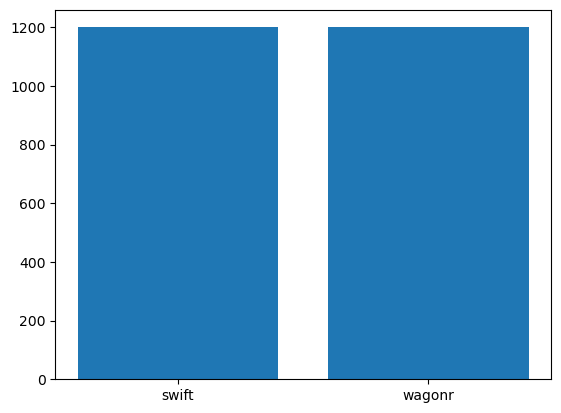

In [0]:
# Train data 
train_class_list = visualize_classes(train_list)

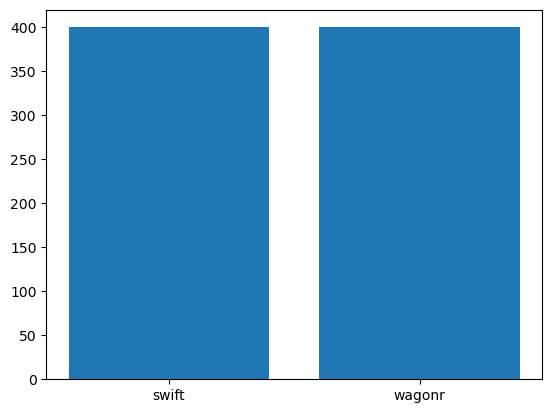

In [0]:
# Validation data 
val_class_list = visualize_classes(validation_list)

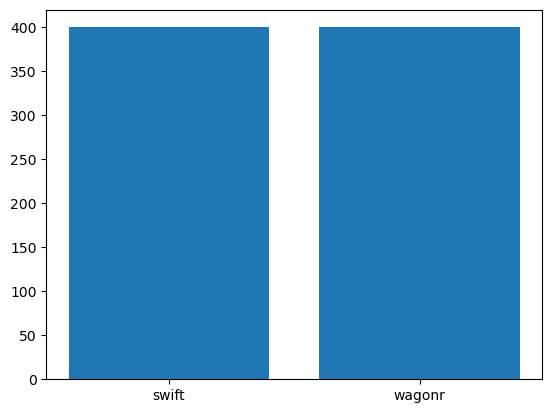

In [0]:
# Test data 
test_class_list = visualize_classes(test_list)

## Convert image data to NumPy array for usage in training

In [0]:
def create_numpy_image_array(image_path_list):
  
  images_numpy = np.zeros((len(image_path_list), new_width, new_height, number_channels))
  
  for index in tqdm(range(len(image_path_list))):
    img = read_and_reshape_image(image_path_list[index])
    images_numpy[index, :, :, :] = img

  return images_numpy

In [0]:
train_images_numpy = create_numpy_image_array(train_list)
print(f"Train images shape: {train_images_numpy.shape}")

Train images shape: (2400, 100, 100, 3)


100%|██████████| 2400/2400 [00:10<00:00, 232.46it/s]


In [0]:
val_images_numpy = create_numpy_image_array(validation_list)
print(f"Validation images shape: {val_images_numpy.shape}")

Validation images shape: (800, 100, 100, 3)


100%|██████████| 800/800 [00:04<00:00, 196.77it/s]


In [0]:
test_images_numpy = create_numpy_image_array(test_list)
print(f"Test images shape: {test_images_numpy.shape}")

Test images shape: (800, 100, 100, 3)


100%|██████████| 800/800 [00:04<00:00, 168.26it/s]


## Validate Original Data With NumPy Data

In [0]:
print(f'Range of pixel values in test images: [{np.amin(test_images_numpy)}, {np.amax(test_images_numpy)}]')

Range of pixel values in test images: [0.0, 1.0]


Shape: (153, 271, 3)
Reshape: (100, 100, 3)


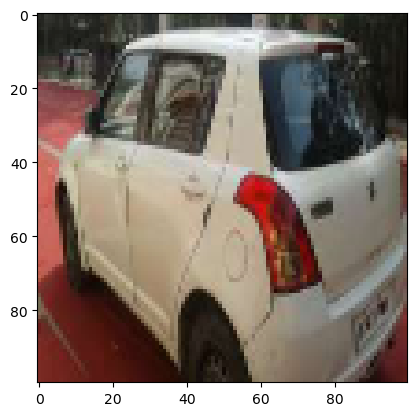

In [0]:
plt.imshow(test_images_numpy[100, :, :, :])

image = read_and_reshape_image(test_list[100], show_shape=True)

plt.imshow(image)

## Save processed data to Pickle for further usage

In [0]:
import pickle as pkl

pickle_path = f"{root_folder}/{dataset_name}/train_test_val_numpy.pkl"
pkl.dump([train_images_numpy, train_class_list, 
          val_images_numpy, val_class_list,
          test_images_numpy, test_class_list], 
         open(pickle_path, "wb"))
print(f"Saving NumPy arrays to {pickle_path}")

Saving NumPy arrays to /data/workspace_files/kaggle_cars_data/cars/train_test_val_numpy.pkl
